<a href="https://colab.research.google.com/github/abhaypratapsinghh08/Project_3_DeepLearning/blob/main/Mini_project_3_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mini Project 3

## Objective: Use Python libraries such as Pandas for data operations, Seaborn and Matplotlib for data visualization and EDA tasks, NLTK to extract and analyze the information, Sklearn for model building and performance visualization, to predict our different categories of people’s mindsets.

In [ ]:
import numpy as np
import pandas as pd
import os

import re
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem.porter import *

from sklearn.model_selection import train_test_split
import tensorflow as tf
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

pd.options.plotting.backend = "plotly"

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## 1. Read the Data from the Given excel file.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
tweet_df = pd.read_csv('/content/drive/MyDrive/dataset/mini project 3/Twitter_Data.csv')
tweet_df

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0
...,...,...
162975,why these 456 crores paid neerav modi not reco...,-1.0
162976,dear rss terrorist payal gawar what about modi...,-1.0
162977,did you cover her interaction forum where she ...,0.0
162978,there big project came into india modi dream p...,0.0


## 2. Change our dependent variable to categorical. ( 0 to “Neutral,” -1 to “Negative”, 1 to “Positive”).

In [ ]:
# replacing values
tweet_df['category'].replace([0, -1, 1],
                        ['Neutral', 'Negative', 'Positive'], inplace=True)

In [ ]:
tweet_df

,clean_text,category
0,when modi promised “minimum government maximum...,Negative
1,talk all the nonsense and continue all the dra...,Neutral
2,what did just say vote for modi welcome bjp t...,Positive
3,asking his supporters prefix chowkidar their n...,Positive
4,answer who among these the most powerful world...,Positive
...,...,...
162975,why these 456 crores paid neerav modi not reco...,Negative
162976,dear rss terrorist payal gawar what about modi...,Negative
162977,did you cover her interaction forum where she ...,Neutral
162978,there big project came into india modi dream p...,Neutral


## 3. Do Missing value analysis and drop all null/missing values

In [ ]:
tweet_df.isnull().sum()

clean_text    4
category      7
dtype: int64

In [ ]:
tweet_df.dropna(axis=0, inplace=True)

In [ ]:
tweet_df.isnull().sum()

clean_text    0
category      0
dtype: int64

In [ ]:
tweet_df.groupby('category').count().plot(kind = 'bar')

## 4. Do text cleaning. (remove every symbol except alphanumeric, transform all words to lower case, and remove punctuation and stopwords )

In [ ]:

def tweet_to_words(tweet):
    text = tweet.lower()
    text = re.sub(r"[^a-zA-Z0-9]", " ", text)
    words = text.split()
    words = [w for w in words if w not in stopwords.words("english")]
    words = [PorterStemmer().stem(w) for w in words]
    return words

print("\nOriginal Tweet ->", tweet_df['clean_text'][0])
print("\nProcessed Tweet ->", tweet_to_words(tweet_df['clean_text'][0]))


Original Tweet -> when modi promised “minimum government maximum governance” expected him begin the difficult job reforming the state why does take years get justice state should and not business and should exit psus and temples

Processed Tweet -> ['modi', 'promis', 'minimum', 'govern', 'maximum', 'govern', 'expect', 'begin', 'difficult', 'job', 'reform', 'state', 'take', 'year', 'get', 'justic', 'state', 'busi', 'exit', 'psu', 'templ']


## 5. Create a new column and find the length of each sentence (how many words they contain)

In [ ]:

tweet_df['number_of_words'] = tweet_df.clean_text.apply(lambda x: len(x.split()))
tweet_df[:5]

,clean_text,category,number_of_words
0,when modi promised “minimum government maximum...,Negative,33
1,talk all the nonsense and continue all the dra...,Neutral,13
2,what did just say vote for modi welcome bjp t...,Positive,22
3,asking his supporters prefix chowkidar their n...,Positive,34
4,answer who among these the most powerful world...,Positive,14


## 6. Split data into independent(X) and dependent(y) dataframe

In [ ]:

from sklearn.preprocessing import LabelEncoder
X = list(map(tweet_to_words, tweet_df['clean_text']))
le = LabelEncoder()
Y = le.fit_transform(tweet_df['category'])

In [ ]:
X[0]

['modi',
 'promis',
 'minimum',
 'govern',
 'maximum',
 'govern',
 'expect',
 'begin',
 'difficult',
 'job',
 'reform',
 'state',
 'take',
 'year',
 'get',
 'justic',
 'state',
 'busi',
 'exit',
 'psu',
 'templ']

In [ ]:
Y[0]

0

## 7. Do operations on text data

 Hints:
*   Do one-hot encoding for each sentence (use TensorFlow)
*   Add padding from the front side (use Tensorflow)
*   Build an LSTM model and compile it (describe features, input length vocabulary size, information drop-out layer, activation function for output, )
*   Do dummy variable creation for the dependent variable
*   split the data into tests and train

In [ ]:

from tensorflow.keras.preprocessing.text import one_hot
corpus = 'clean_text'
onehot_repr = [one_hot(words, 5000) for words in corpus]

print(onehot_repr)

[[3663], [4293], [1211], [4534], [3094], [], [1390], [1211], [38], [1390]]


In [ ]:
from keras.preprocessing.text import Tokenizer
#from keras.preprocessing.sequence import pad_sequences
from keras.utils import pad_sequences


max_words = 5000
max_len = 50

def tokenize_pad_sequences(text):
    tokenizer = Tokenizer(num_words = max_words, lower = True, split = ' ')
    tokenizer.fit_on_texts(text)
    X = tokenizer.texts_to_sequences(text)
    X = pad_sequences(X, padding = 'pre', maxlen = max_len)
    return X, tokenizer

print('Before Tokenization & Padding \n', tweet_df['clean_text'][0])
X, tokenizer = tokenize_pad_sequences(tweet_df['clean_text'])
print('After Tokenization & Padding \n', X[0])

Before Tokenization & Padding 
 when modi promised “minimum government maximum governance” expected him begin the difficult job reforming the state why does take years get justice state should and not business and should exit psus and temples
After Tokenization & Padding 
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0   42    1  307   66 1726 1119   40
 2378    2 1211  205    2  215   32  155  100   49   69 1068  215   50
    3    6  546    3   50 4179    3 2806]


In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout
from keras.metrics import Precision, Recall
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop
from keras.callbacks import LearningRateScheduler
from keras.callbacks import History
from keras import losses

vocab_size = 5000
embedding_size = 32
epochs = 25
lr = 0.5
decay_rate = lr / epochs
momentum = 0.7

sgd = tf.keras.optimizers.legacy.SGD(learning_rate = lr, momentum = momentum, decay = decay_rate, nesterov = False)

model = Sequential()
model.add(Embedding(vocab_size, embedding_size, input_length = max_len))
model.add(Conv1D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(MaxPooling1D(pool_size = 2))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.4))
model.add(Dense(3, activation = 'softmax'))

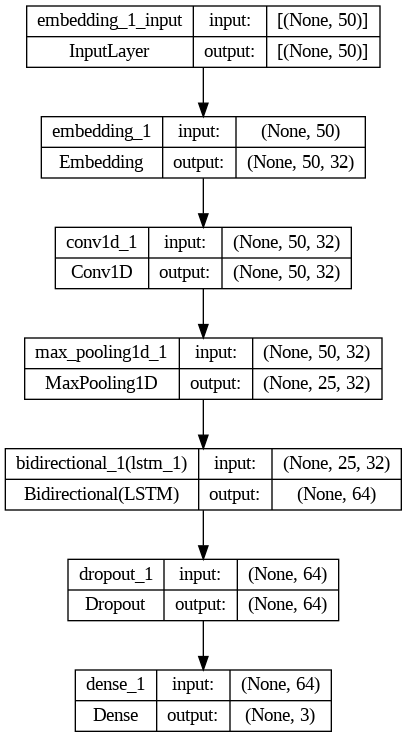

In [ ]:
tf.keras.utils.plot_model(model, show_shapes = True)

In [ ]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 50, 32)            160000    
                                                                 
 conv1d_1 (Conv1D)           (None, 50, 32)            3104      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 25, 32)           0         
 1D)                                                             
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               16640     
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 3)                

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer = sgd, 
               metrics = ['accuracy', Precision(), Recall()])

In [ ]:
y = pd.get_dummies(tweet_df['category'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 12)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.3, random_state = 12)
print('Train Set ->', X_train.shape, y_train.shape)
print('Validation Set ->', X_val.shape, y_val.shape)
print('Test Set ->', X_test.shape, y_test.shape)

Train Set -> (85558, 50) (85558, 3)
Validation Set -> (36668, 50) (36668, 3)
Test Set -> (40743, 50) (40743, 3)


## 8. Train new model

In [ ]:

batch_size = 64
history = model.fit(X_train, y_train,
                      validation_data = (X_val, y_val),
                      batch_size = batch_size, epochs = epochs, verbose = 1)

Epoch 1/25
1337/1337 [==============================] - 39s 27ms/step - loss: 0.9466 - accuracy: 0.5547 - precision: 0.6062 - recall: 0.3945 - val_loss: 0.8042 - val_accuracy: 0.6528 - val_precision: 0.7200 - val_recall: 0.5436
Epoch 2/25
1337/1337 [==============================] - 34s 25ms/step - loss: 0.6940 - accuracy: 0.7052 - precision: 0.7612 - recall: 0.6338 - val_loss: 0.5720 - val_accuracy: 0.7589 - val_precision: 0.7975 - val_recall: 0.7199
Epoch 3/25
1337/1337 [==============================] - 35s 26ms/step - loss: 0.5418 - accuracy: 0.7865 - precision: 0.8144 - recall: 0.7514 - val_loss: 0.4973 - val_accuracy: 0.8117 - val_precision: 0.8307 - val_recall: 0.7848
Epoch 4/25
1337/1337 [==============================] - 34s 26ms/step - loss: 0.4876 - accuracy: 0.8197 - precision: 0.8353 - recall: 0.7961 - val_loss: 0.4629 - val_accuracy: 0.8339 - val_precision: 0.8453 - val_recall: 0.8144
Epoch 5/25
1337/1337 [==============================] - 34s 25ms/step - loss: 0.4595 - a

### 9. Normalize the prediction as same as the original data(prediction might be in decimal, so whoever is nearest to 1 is predicted as yes and set other as 0)

In [ ]:

from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
combi = tweet_df.append(tweet_df, ignore_index=True)
tokenized_tweet = combi['clean_text'].apply(lambda x : x.split())
tokenized_tweet.head()

<ipython-input-56-8c91fcb80eef>:4: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



0    [when, modi, promised, “minimum, government, m...
1    [talk, all, the, nonsense, and, continue, all,...
2    [what, did, just, say, vote, for, modi, welcom...
3    [asking, his, supporters, prefix, chowkidar, t...
4    [answer, who, among, these, the, most, powerfu...
Name: clean_text, dtype: object

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem.porter import *
from nltk.stem import WordNetLemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
tokenized_tweet = tokenized_tweet.apply(lambda x: [lemmatizer.lemmatize(i) for i in x])
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i]) 
combi['clean_text'] = tokenized_tweet

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


## 10. Measure performance metrics and accuracy

In [ ]:

import keras.backend as K

def f1_score(precision, recall):    
    f1_val = 2*(precision * recall)/(precision + recall + K.epsilon())
    return f1_val

In [ ]:
loss, accuracy, precision, recall = model.evaluate(X_test, y_test, verbose = 0)
print('')
print('Accuracy  : {:.4f}'.format(accuracy))
print('Precision : {:.4f}'.format(precision))
print('Recall    : {:.4f}'.format(recall))
print('F1 Score  : {:.4f}'.format(f1_score(precision, recall)))


Accuracy  : 0.8864
Precision : 0.8893
Recall    : 0.8820
F1 Score  : 0.8856


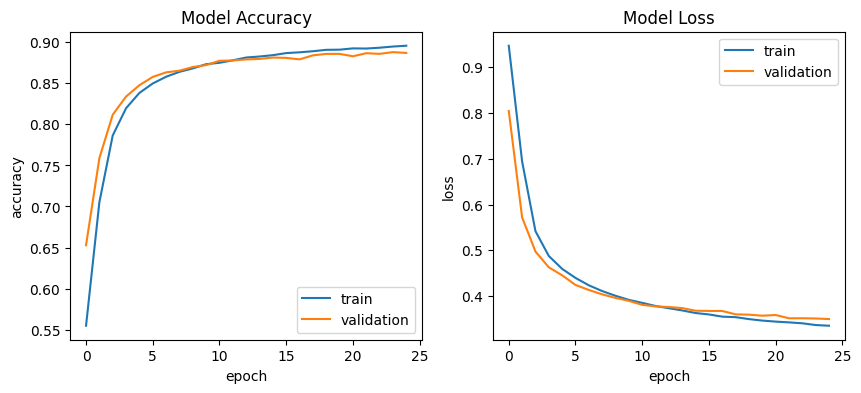

In [ ]:
def plot_training_hist(history):
    fig, ax = plt.subplots(1, 2, figsize = (10, 4))
    # first plot
    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])
    ax[0].set_title('Model Accuracy')
    ax[0].set_xlabel('epoch')
    ax[0].set_ylabel('accuracy')
    ax[0].legend(['train', 'validation'], loc = 'best')
    # second plot
    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].set_title('Model Loss')
    ax[1].set_xlabel('epoch')
    ax[1].set_ylabel('loss')
    ax[1].legend(['train', 'validation'], loc = 'best')
    
plot_training_hist(history)

1274/1274 [==============================] - 8s 5ms/step


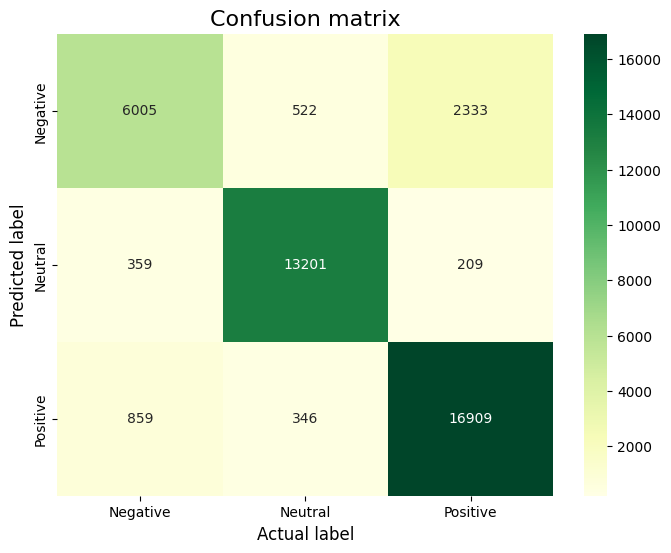

In [ ]:
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

def plot_confusion_matrix(model, X_test, y_test):
    sentiment_classes = ['Negative', 'Neutral', 'Positive']
    y_pred = model.predict(X_test)
    cm = confusion_matrix(np.argmax(np.array(y_test), axis = 1), np.argmax(y_pred, axis = 1))
    plt.figure(figsize = (8, 6))
    sns.heatmap(cm, cmap = plt.cm.YlGn, annot = True, fmt = 'd', 
                xticklabels = sentiment_classes,
                yticklabels = sentiment_classes)
    plt.title('Confusion matrix', fontsize = 16)
    plt.xlabel('Actual label', fontsize = 12)
    plt.ylabel('Predicted label', fontsize = 12)
    
plot_confusion_matrix(model, X_test, y_test)

In [ ]:
model.save('best_model.h5')
print('Best Model Saved')

Best Model Saved


In [ ]:
from keras.models import load_model
model = load_model('best_model.h5')

def predict_class(text):
    sentiment_classes = ['Negative', 'Neutral', 'Positive']
    max_len = 50
    xt = tokenizer.texts_to_sequences(text)
    xt = pad_sequences(xt, padding = 'pre', maxlen = max_len)
    yt = model.predict(xt).argmax(axis = 1)
    print('The predicted sentiment is', sentiment_classes[yt[0]])

In [ ]:
predict_class(['I hate when I have to call and wake people up'])

1/1 [==============================] - 1s 637ms/step
The predicted sentiment is Negative


In [ ]:
predict_class(['The food was ok'])

1/1 [==============================] - 0s 21ms/step
The predicted sentiment is Neutral


In [ ]:
predict_class(["He is a very good boy"])

1/1 [==============================] - 0s 18ms/step
The predicted sentiment is Positive


## 11. print Classification report

In [ ]:

from sklearn.metrics import classification_report
def print_classification_report(model, X_test, y_test):
    sentiment_classes = ['Negative', 'Neutral', 'Positive']
    y_pred = model.predict(X_test)
    cr = classification_report(np.argmax(np.array(y_test), axis = 1), np.argmax(y_pred, axis = 1))
    print(cr)
print_classification_report(model, X_test, y_test)

1274/1274 [==============================] - 11s 8ms/step
              precision    recall  f1-score   support

           0       0.83      0.68      0.75      8860
           1       0.94      0.96      0.95     13769
           2       0.87      0.93      0.90     18114

    accuracy                           0.89     40743
   macro avg       0.88      0.86      0.87     40743
weighted avg       0.88      0.89      0.88     40743

